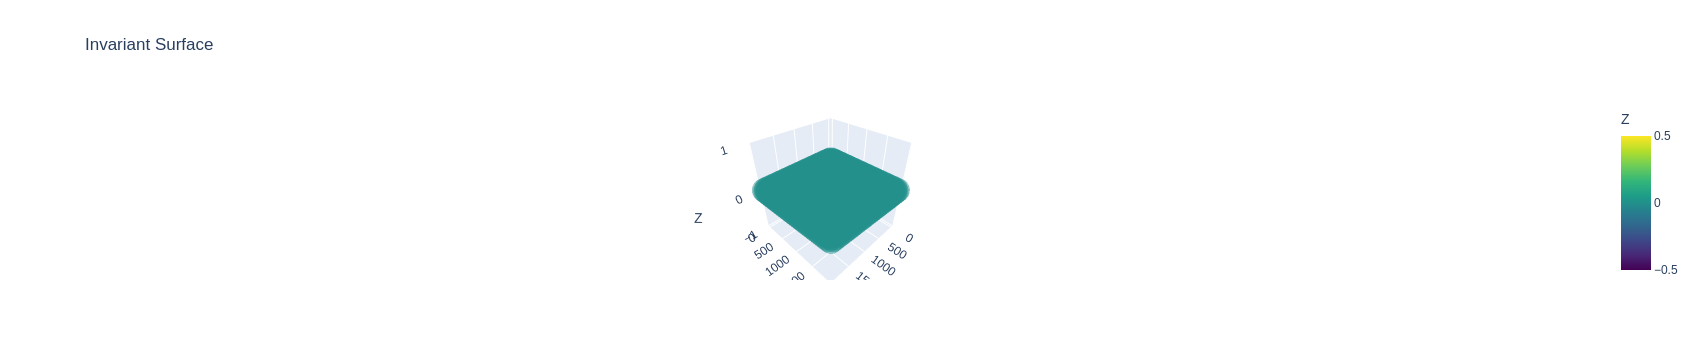

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import param
import panel as pn
pn.extension()

class CurvePoolParameters(param.Parameterized):
    coins = param.List(['DAI', 'USDC', 'USDT'], doc="List of coins in the pool")
    A = param.Number(500, bounds=(0, None), doc="Amplification coefficient")
    fee = param.Number(0.0004, bounds=(0, 1), doc="Trading fee")
    admin_fee = param.Number(0.5, bounds=(0, 1), doc="Admin fee")
    lp_token_name = param.String("Curve LP Token", doc="LP token name")
    lp_token_symbol = param.String("crvLP", doc="LP token symbol")
    
    def invariant_surface_plot(self, balances, step=50, epsilon=1e-8):
        num_coins = len(balances)
        X, Y = np.meshgrid(np.arange(0, balances[0] * 2, step),
                           np.arange(0, balances[1] * 2, step))

        total = np.sum((np.array(balances) + epsilon) ** (1 - self.A))
        Z = (total ** (1 / np.maximum(1 - self.A, epsilon))) * np.ones_like(X)

        data = np.stack([X, Y, Z], axis=2)
        df = data.reshape(-1, data.shape[-1])
        df = pd.DataFrame(df, columns=['X', 'Y', 'Z'])

        plot = px.scatter_3d(df, x='X', y='Y', z='Z', color='Z', title='Invariant Surface',
                             color_continuous_scale='Viridis', opacity=0.5)

        return plot

curve_pool = CurvePoolParameters()
balances = [1000, 1000, 1000]
plot = curve_pool.invariant_surface_plot(balances)
plot.show()


In [ ]:
pn.Row(curve_pool, plot)


pn.extension('plotly')



Row
    [0] Column(margin=5, name='CurvePoolParameters', width=300)
        [0] StaticText(value='<b>CurvePoolParameters</b...)
        [1] ListInput(name='Coins', type=<class 'list'>, value=['DAI', 'USDC', 'USDT'])
        [2] FloatInput(name='A', start=0, value=500)
        [3] FloatSlider(name='Fee', value=0.0004)
        [4] FloatSlider(name='Admin fee', value=0.5)
        [5] TextInput(name='Lp token name', value='Curve LP Token')
        [6] TextInput(name='Lp token symbol', value='crvLP')
    [1] Plotly(Figure)